In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import re
import six

#### Helper para salvar graficos

In [2]:
def autolabel(rects, xpos='center', ax=None):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')

#### Captura paths de cada ano:

In [3]:
local_raiz = 'database/'
locais_anos = list(Path(local_raiz).glob('*'))

#### Listas para armazenar os csvs especificos de cada ano:

In [4]:
processos_anos = []
andamentos_anos = []
assuntos_anos = []

In [5]:
for local in locais_anos:
    processos_anos.append(list(Path(local).glob('*_recife.csv'))[0])
    andamentos_anos.append(list(Path(local).glob('*_andamentos.csv'))[0])
    assuntos_anos.append(list(Path(local).glob('*_assuntos.csv'))[0])

df_processos = [pd.read_csv(str(processo)) for processo in processos_anos]
df_andamentos = [pd.read_csv(str(andamento)) for andamento in andamentos_anos]
df_assuntos = [pd.read_csv(str(assunto)) for assunto in assuntos_anos]

#### Criação de DataFrames

In [6]:
df_processos_totais = pd.concat(df_processos)
df_andamentos_totais = pd.concat(df_andamentos)
df_assuntos_totais = pd.concat(df_assuntos)

### Frequencia de processos por ano

Os valores foram obtidos realizando uma pesquisa no banco, para fac

In [7]:
anos_frequencia = pd.DataFrame({
        'Ano': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
        'Proc_ano': [16558, 17460, 17302, 18466, 17366, 11605, 12519, 15075],
        'Proc_vcm': [235, 334, 286, 407, 972, 1111, 2169, 3786]
})

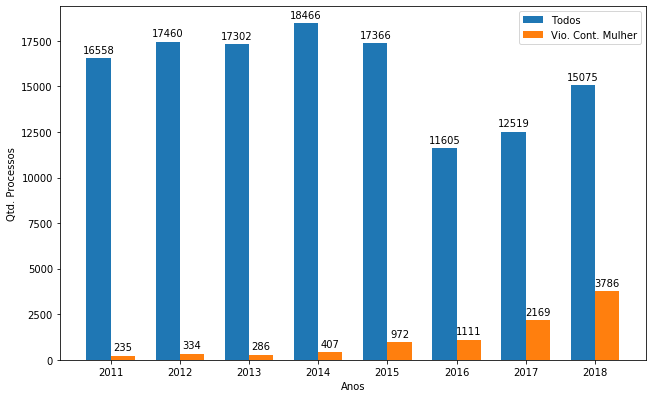

In [11]:
ind = np.arange(len(anos_frequencia['Proc_vcm']))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, anos_frequencia['Proc_ano'], width,
                label='Todos')
rects2 = ax.bar(ind + width/2, anos_frequencia['Proc_vcm'], width,
                label='Vio. Cont. Mulher')

ax.set_ylabel('Qtd. Processos'); ax.set_xticks(ind)
ax.set_xticklabels(anos_frequencia['Ano']); ax.set_xlabel('Anos'); ax.legend()
autolabel(rects1, "center", ax); autolabel(rects2, "center", ax)

fig.set_size_inches(10.5, 6.5, forward=True)
fig.savefig('figures/processos_anos', dpi=100, bbox_inches='tight')
plt.show()

In [19]:
anos_frequencia['Proc_ano'].sum()

126351

In [14]:
proporcoes = []
total_processos = anos_frequencia['Proc_ano'].sum()
for valor in anos_frequencia['Proc_vcm'].values:
    proporcoes.append(valor*100/total_processos)

In [15]:
proporcoes

[0.1859898220037831,
 0.264342981060696,
 0.22635357060885944,
 0.3221185427895307,
 0.7692855616496902,
 0.8792965627498002,
 1.7166464847923641,
 2.9964147493886077]

In [23]:
proporcoes = list(map(lambda x: float("{0:.2f}".format(x)), proporcoes))

In [24]:
proporcoes

[0.19, 0.26, 0.23, 0.32, 0.77, 0.88, 1.72, 3.0]

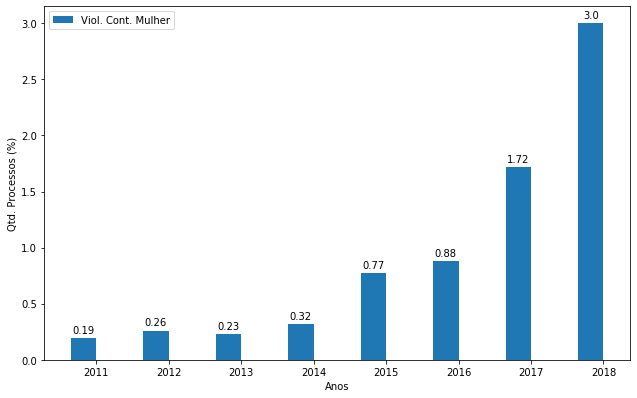

In [26]:
ind = np.arange(len(proporcoes))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, proporcoes, width,
                label='Viol. Cont. Mulher')

ax.set_ylabel('Qtd. Processos (%)'); ax.set_xticks(ind)
ax.set_xticklabels(anos_frequencia['Ano']); ax.set_xlabel('Anos'); ax.legend()
autolabel(rects1, "center", ax)

fig.set_size_inches(10.5, 6.5, forward=True)
fig.savefig('figures/frequencia_processos_anos', dpi=100, bbox_inches='tight')
plt.show()

### Analisando as Classes CNJs

In [18]:
classe_cnj = df_processos_totais['Classe CNJ']

In [19]:
classe_cnj.value_counts()

Medidas Protetivas de urgência (Lei Maria da Penha)             2838
Ação Penal - Procedimento Sumário                               2269
Medidas Protetivas de urgência (Lei Maria da Penha) Criminal    2240
Inquérito Policial                                               569
Auto de Prisão em Flagrante                                      152
Representação Criminal/Notícia de Crime                           52
Ação Penal - Procedimento Ordinário                               51
Insanidade Mental do Acusado                                      17
Habeas Corpus                                                      1
Incidente de Falsidade                                             1
Ação Penal - Procedimento Sumaríssimo                              1
Carta Precatória Criminal                                          1
Habeas Corpus Criminal                                             1
Procedimento Investigatório Criminal (PIC-MP)                      1
Pedido de Quebra de Sigilo de Dado

In [20]:
valores_classe_cnj = classe_cnj.value_counts()
title = 'Frequência das Classes CNJ'

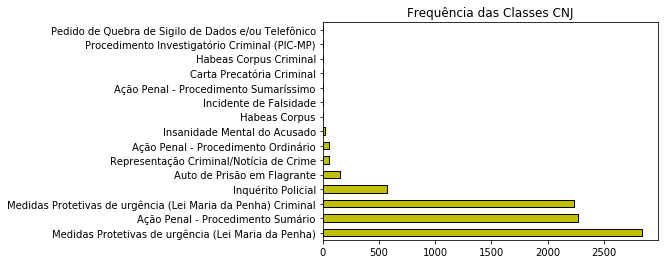

In [21]:
fig = plt.figure()
valores_classe_cnj.plot.barh(title=title, edgecolor='black', color='y')

In [37]:
valores_classe_filtrados = valores_classe_cnj.iloc[valores_classe_cnj.values > 9]

In [38]:
valores_classe_filtrados

Medidas Protetivas de urgência (Lei Maria da Penha)             2838
Ação Penal - Procedimento Sumário                               2269
Medidas Protetivas de urgência (Lei Maria da Penha) Criminal    2240
Inquérito Policial                                               569
Auto de Prisão em Flagrante                                      152
Representação Criminal/Notícia de Crime                           52
Ação Penal - Procedimento Ordinário                               51
Insanidade Mental do Acusado                                      17
Name: Classe CNJ, dtype: int64

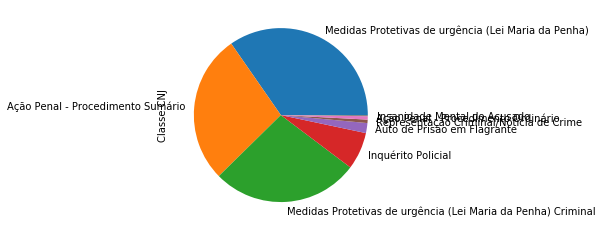

In [39]:
valores_classe_filtrados.plot.pie()

#### Salva gráfico

In [ ]:
fig.savefig('figures/{}'.format(title), dpi=100, bbox_inches='tight')

### Analisando os Assuntos presentes nos processos